*Difficulty level -  Easy*

Dataset: You are provided with a dataset named "sales_data.csv," which contains information about sales transactions. The dataset includes columns such as "Date," "Product," "Quantity," "Price," and "Customer."

Include comments and explanations in your code to make it clear and understandable.
Provide appropriate titles and labels for your plots

Tasks:
1 Load the dataset using Pandas and display the first few rows to understand its structure.
2 Perform data cleaning:
    •	Check for missing values and decide on a strategy to handle them.
    •	Identify and remove any duplicate rows.
3 Compute and display the following summary statistics:
    •	Mean, median, and standard deviation of the "Quantity" and "Price" columns.
    •	Total sales revenue (computed as the sum of Quantity * Price).
4 Visualize the data:
    •	Create a histogram of the "Quantity" column to understand the distribution of sales quantities.
    •	Generate a scatter plot of "Price" vs. "Quantity" to explore any potential relationships.
5 Perform categorical analysis:
    •	Group the data by "Product" and compute the total quantity sold and average price for each product.
    •	Visualize the product-wise sales using a bar chart.
6 Identify outliers:
    •	Use the z-score method to detect potential outliers in the "Price" column.
    •	Visualize the outliers using a box plot.
7 Additional Analysis:
    •	Calculate the weekly sales by aggregating the data based on the "Date" column.
    •	Visualize the weekly sales trend over time using a line plot.


In [26]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Task 1: Load the dataset
data = pd.read_csv(r'C:\Users\YG168VL\Python training\sales_data.csv')
data.head()


,Order ID,Product,Quantity,Price,Order Date,Customer
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [27]:
#2
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18289 entries, 0 to 18288
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order ID    18289 non-null  int64  
 1   Product     18289 non-null  object 
 2   Quantity    18289 non-null  int64  
 3   Price       18289 non-null  float64
 4   Order Date  18289 non-null  object 
 5   Customer    18289 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 857.4+ KB


Order ID      17537
Product          19
Quantity          7
Price            17
Order Date    13583
Customer      17119
dtype: int64

In [28]:
data.isnull().sum()


Order ID      0
Product       0
Quantity      0
Price         0
Order Date    0
Customer      0
dtype: int64

*Difficulty level - Medium*
Analyse the given dataset and come up with an analysis using different metrics and plots to answer the questions below:

After each question intsert a code to justify your answer and also write down the answer in the text box itself.



In [29]:
(data.isnull().sum()/(len(data)))*100

Order ID      0.0
Product       0.0
Quantity      0.0
Price         0.0
Order Date    0.0
Customer      0.0
dtype: float64

In [30]:
data = data.drop(['Order ID'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18289 entries, 0 to 18288
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     18289 non-null  object 
 1   Quantity    18289 non-null  int64  
 2   Price       18289 non-null  float64
 3   Order Date  18289 non-null  object 
 4   Customer    18289 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 714.5+ KB


In [31]:
#3
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,18289.0,1.124610,0.436410,1.00,1.00,1.00,1.0,7.0
Price,18289.0,184.431026,330.913377,2.99,11.95,14.95,150.0,1700.0


In [32]:

data['Total sales revenue']=data['Quantity']*data['Price']
data.head()

,Product,Quantity,Price,Order Date,Customer,Total sales revenue
0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [33]:
#4
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Product', 'Order Date', 'Customer'], dtype='object')
Numerical Variables:
['Quantity', 'Price', 'Total sales revenue']


Quantity
Skew : 4.58


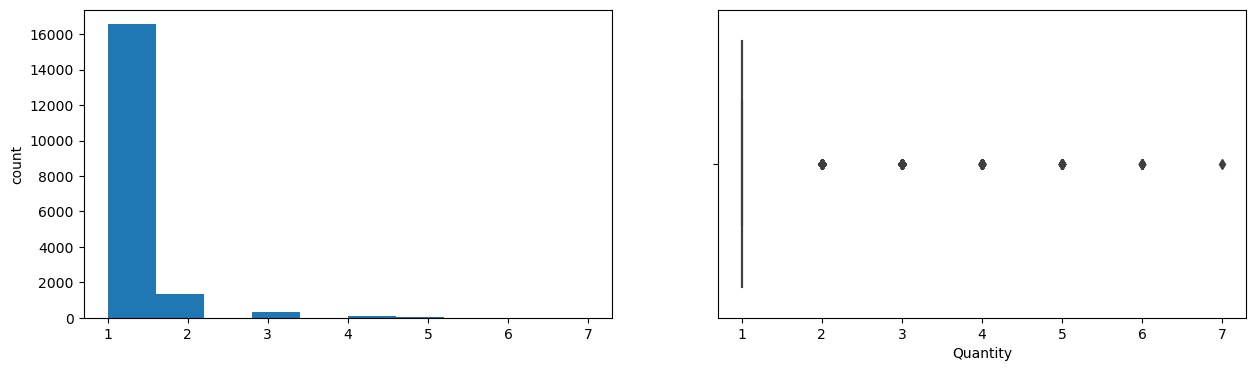

Price
Skew : 2.86


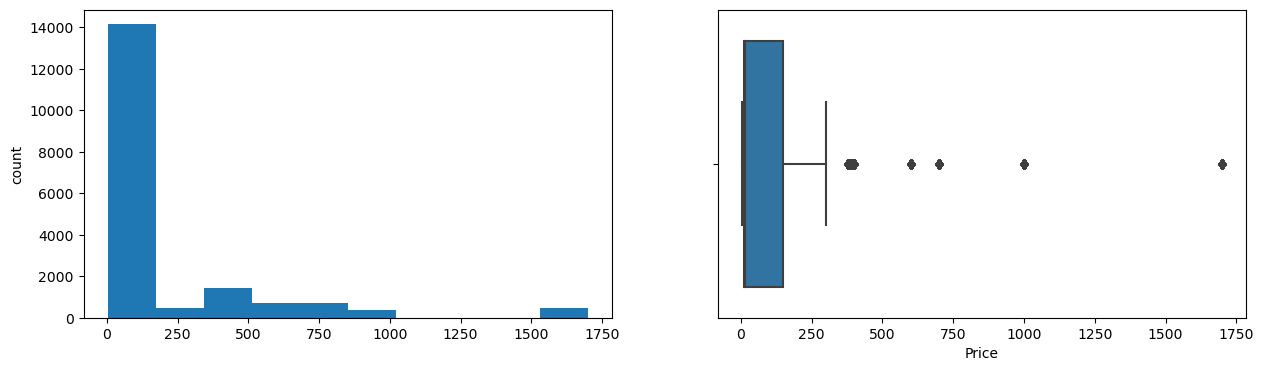

Total sales revenue
Skew : 2.91


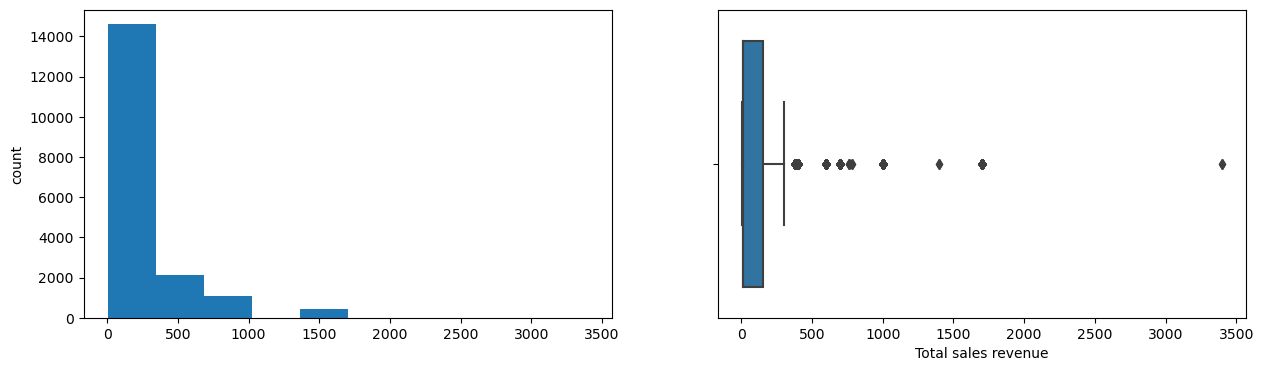

In [34]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

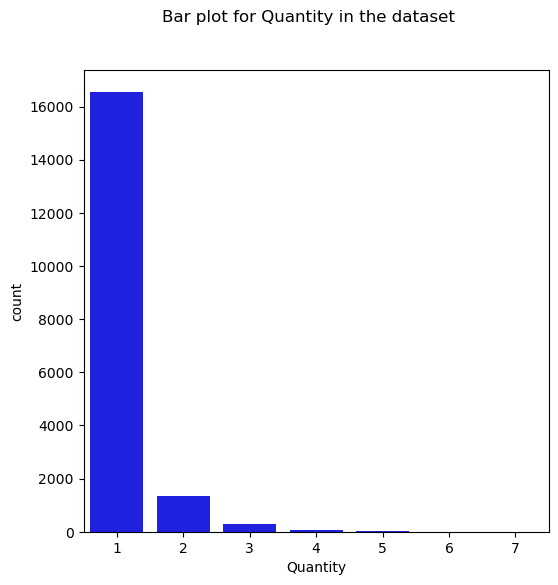

In [35]:
fig, axes = plt.subplots( figsize = (6, 6))
fig.suptitle('Bar plot for Quantity in the dataset')
sns.countplot( x = 'Quantity', data = data, color = 'blue', 
              order = data['Quantity'].value_counts().index);

In [36]:
# Function for log transformation of the column
'''def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()
log_transform(data,['Quantity','Price'])

#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Quantity"], axlabel="Quantity");'''

'def log_transform(data,col):\n    for colname in col:\n        if (data[colname] == 1.0).all():\n            data[colname + \'_log\'] = np.log(data[colname]+1)\n        else:\n            data[colname + \'_log\'] = np.log(data[colname])\n    data.info()\nlog_transform(data,[\'Quantity\',\'Price\'])\n\n#Log transformation of the feature \'Kilometers_Driven\'\nsns.distplot(data["Quantity"], axlabel="Quantity");'

<Figure size 1300x1700 with 0 Axes>

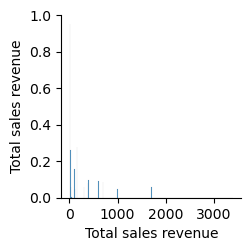

In [37]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Quantity','Price'],axis=1))
plt.show()

In [38]:
#5
data.groupby('Product').agg({'Quantity': 'sum', 'Price': 'mean'})

,Quantity,Price
Product,,
20in Monitor,395,109.99
27in 4K Gaming Monitor,565,389.99
27in FHD Monitor,737,149.99
34in Ultrawide Monitor,653,379.99
AA Batteries (4-pack),2822,3.84
AAA Batteries (4-pack),2936,2.99
Apple Airpods Headphones,1525,150.00
Bose SoundSport Headphones,1288,99.99
Flatscreen TV,459,300.00


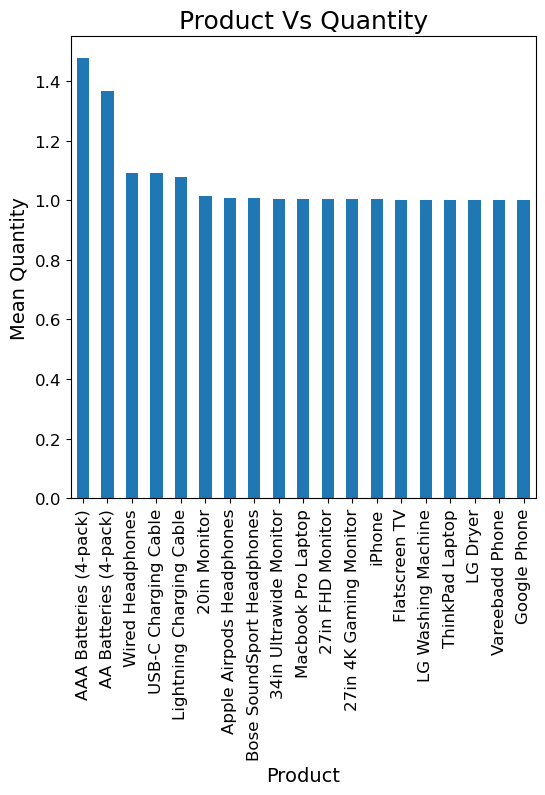

In [39]:
plt.figure(figsize=(6, 6))
data.groupby('Product')['Quantity'].mean().sort_values(ascending=False).plot.bar(ax=plt.gca(), fontsize=12)
plt.title("Product Vs Quantity", fontsize=18)  
plt.xlabel("Product", fontsize=14)  
plt.ylabel("Mean Quantity", fontsize=14)  

plt.show()  

In [40]:
#6
data['Price_ZScore'] = np.abs((data['Price'] - data['Price'].mean()) / data['Price'].std())
z_score_threshold = 3
potential_outliers = data[data['Price_ZScore'] > z_score_threshold]
print("Potential Outliers:")
print(potential_outliers[['Product', 'Price', 'Price_ZScore']])

Potential Outliers:
                  Product   Price  Price_ZScore
8      Macbook Pro Laptop  1700.0      4.579957
85     Macbook Pro Laptop  1700.0      4.579957
89     Macbook Pro Laptop  1700.0      4.579957
92     Macbook Pro Laptop  1700.0      4.579957
135    Macbook Pro Laptop  1700.0      4.579957
...                   ...     ...           ...
18017  Macbook Pro Laptop  1700.0      4.579957
18067  Macbook Pro Laptop  1700.0      4.579957
18079  Macbook Pro Laptop  1700.0      4.579957
18160  Macbook Pro Laptop  1700.0      4.579957
18209  Macbook Pro Laptop  1700.0      4.579957

[453 rows x 3 columns]


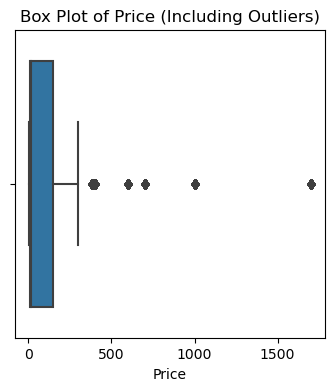

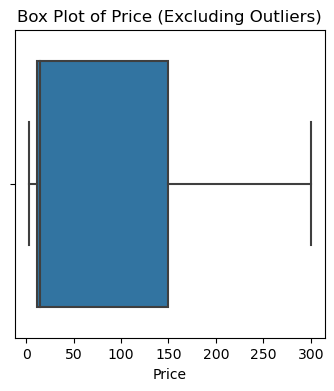

Potential Outliers:
                  Product   Price  Price_ZScore
8      Macbook Pro Laptop  1700.0      4.579957
85     Macbook Pro Laptop  1700.0      4.579957
89     Macbook Pro Laptop  1700.0      4.579957
92     Macbook Pro Laptop  1700.0      4.579957
135    Macbook Pro Laptop  1700.0      4.579957
...                   ...     ...           ...
18017  Macbook Pro Laptop  1700.0      4.579957
18067  Macbook Pro Laptop  1700.0      4.579957
18079  Macbook Pro Laptop  1700.0      4.579957
18160  Macbook Pro Laptop  1700.0      4.579957
18209  Macbook Pro Laptop  1700.0      4.579957

[453 rows x 3 columns]


In [52]:
plt.figure(figsize=(4, 4))
sns.boxplot(x=data['Price'])
plt.title('Box Plot of Price (Including Outliers)')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(4, 4))
sns.boxplot(x=data['Price'], showfliers=False)
plt.title('Box Plot of Price (Excluding Outliers)')
plt.xlabel('Price')
plt.show()

print("Potential Outliers:")
print(potential_outliers[['Product', 'Price', 'Price_ZScore']])


                       Quantity
Order Date                     
2019-04-01/2019-04-07      4742
2019-04-08/2019-04-14      4891
2019-04-15/2019-04-21      4837
2019-04-22/2019-04-28      4697
2019-04-29/2019-05-05      1401


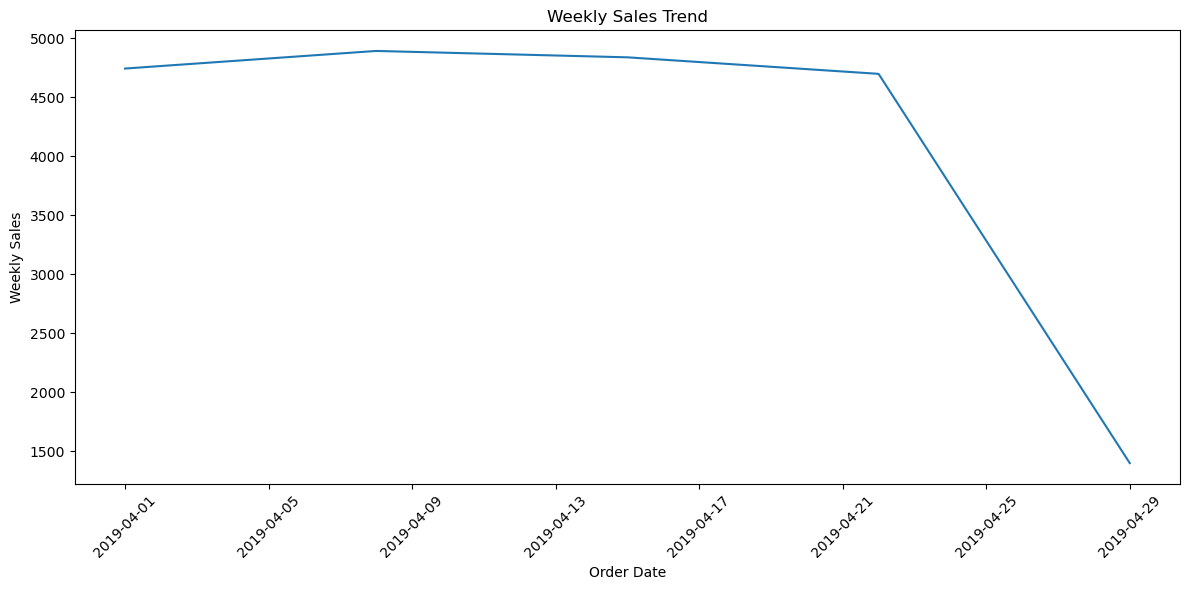

In [42]:
#7
data['Order Date'] = pd.to_datetime(data['Order Date'])
weekly_sales = data.groupby(data['Order Date'].dt.to_period('W')).agg({'Quantity': 'sum'})
print(weekly_sales)
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x=weekly_sales.index.to_timestamp(), y='Quantity')
plt.title('Weekly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [43]:
#supermarket_sales
dt = pd.read_csv(r'C:\Users\YG168VL\Python training\supermarket_sales.csv')
dt.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Q1: What does the customer rating look like and is it skewed?

Answer - 

Rating
Skew : 0.01


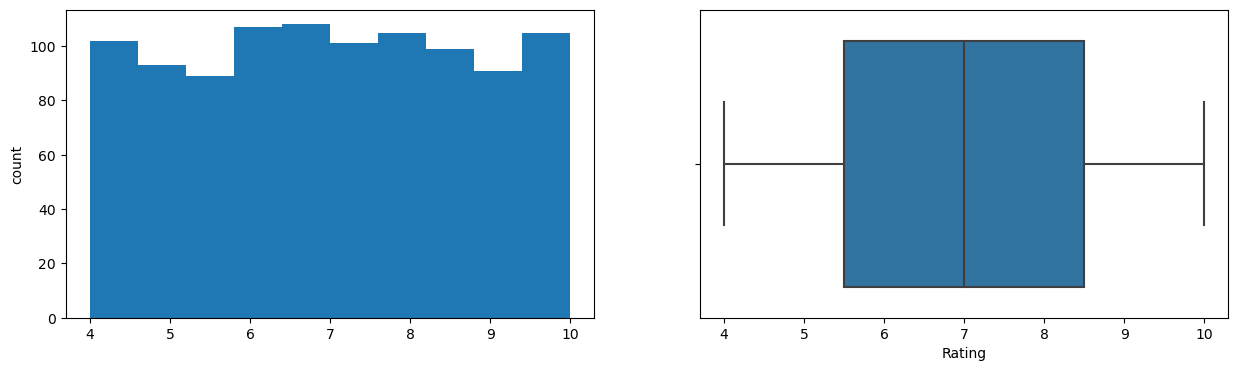

In [44]:
for col in dt.columns:
    if col == 'Rating':
        print(col)
        print('Skew :', round(dt[col].skew(), 2))
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 2, 1)
        dt[col].hist(grid=False)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dt[col])
        plt.show()

Q2: Is there any difference in aggregate sales across branches?

A- 

In [45]:
dt.groupby('Branch')['Total'].sum().reset_index()

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


Question 3: Which is the most pouplar payment method used by customers?

A-

In [46]:
dt.groupby('Payment')['Total'].sum().reset_index()

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


Q4: Does gross income affect the ratings that the customers provide?

A- 

In [47]:
dt['gross income'].corr(dt['Rating'])


-0.03644170499701833

Q5: Which branch is the most profitable?

A-

In [48]:
dt.groupby('Branch')['gross income'].sum().reset_index()

,Branch,gross income
0,A,5057.1605
1,B,5057.0320
2,C,5265.1765


Q6: Is there any time trend in gross income?

A-

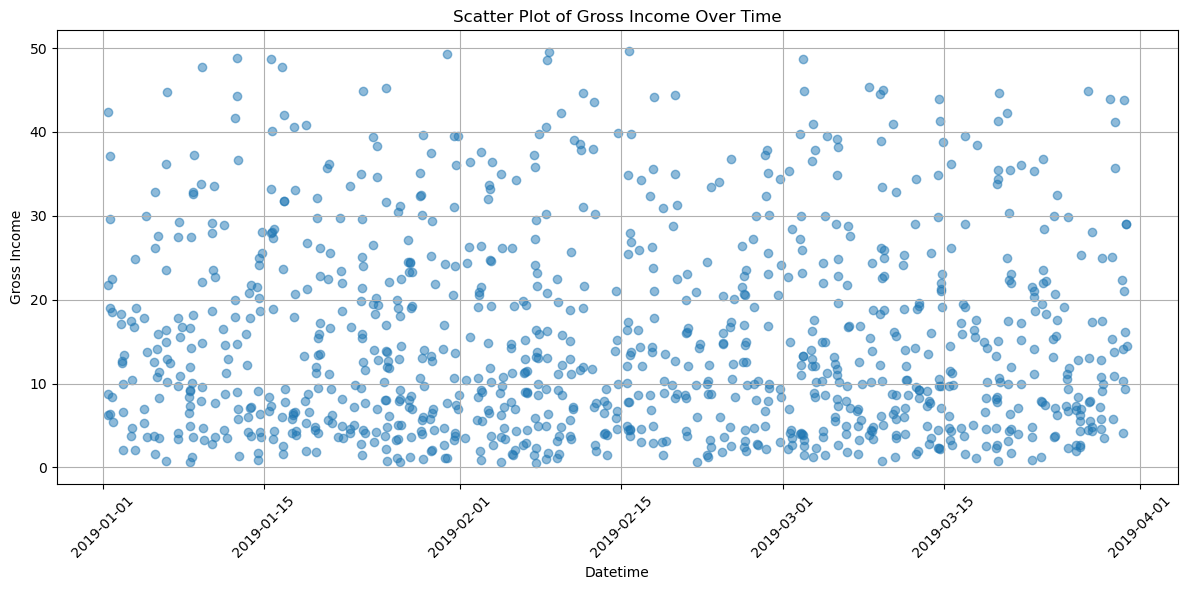

In [49]:
dt['Datetime'] = pd.to_datetime(dt['Date'] + ' ' + dt['Time'])

# Create a scatter plot for gross income over time
plt.figure(figsize=(12, 6))
plt.scatter(dt['Datetime'], dt['gross income'], marker='o', alpha=0.5)
plt.title('Scatter Plot of Gross Income Over Time')
plt.xlabel('Datetime')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Q7: Which product line generates most income?

A-

In [50]:
dt.groupby('Product line')['Total'].sum().reset_index()


,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


Q8: Show the correlation between all variable.

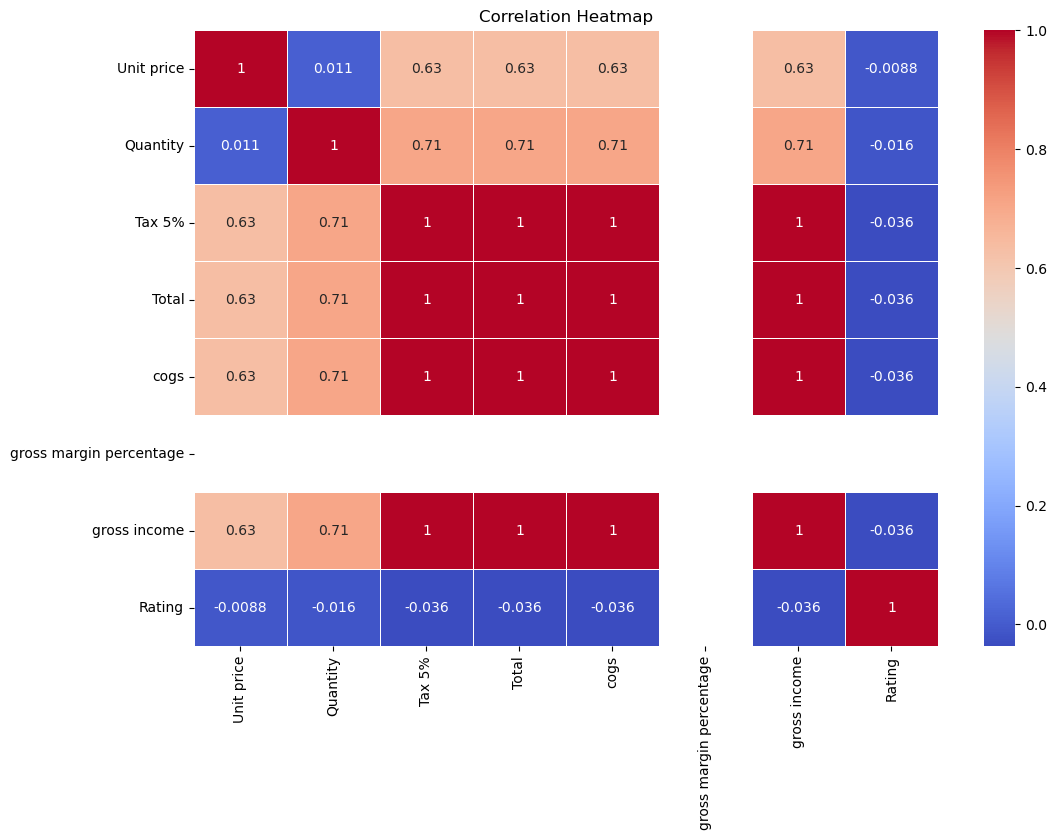

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
